# Chiamaka Aghaizu

In [ ]:
import tensorflow as tf                                                          # ImportingLibraries
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D,MaxPool2D, Dense, Dropout, Flatten, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizer_v2.adam import Adam
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.models import load_model
from keras import Model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

import os
import random
import glob
from PIL import Image, ImageOps

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset= glob.glob('/content/drive/MyDrive/UTKFace/UTKFace/*_*_*_*')             #  name is age_gender_ethnicity_*  keep only files with that format

In [ ]:
random.shuffle(dataset)

In [ ]:
age = [i.split('_')[0].split('/')[-1] for i in dataset]
gender = [i.split('_')[1] for i in dataset]
ethnicity = [i.split('_')[2] for i in dataset]

In [ ]:
age = list(map(int, age))                                                        #string to int
gender = list(map(int,gender))
ethnicity = list(map(int,ethnicity))

In [ ]:
gender_classes = to_categorical(gender, num_classes=2)
ethnicity_classes = to_categorical(ethnicity,num_classes=5)

 Transfer Learning using VGG16

In [ ]:
X_data2 =[]
count=0
for i in dataset[:12000]:
  face = Image.open(i)
  face = face.resize((128, 128))
  X_data2.append(np.asarray(face))


X2 = np.squeeze(X_data2)
X2 = X2.astype('float32')
X2 /= 255

In [ ]:
X3=X2

# Predict on Age




In [ ]:
X2_train_age,X2_val_age, y2_train_age, y2_val_age = train_test_split(X2,age[:12000], test_size=0.30)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128,128,3))
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
vgg_model_age = Sequential([
    base_model,

    Flatten(),                                                                    # Flatten out layers
    Dense(512, activation='relu'),
    Dropout(0.05),

    Dense(128, activation='relu'),
    Dropout(0.05),

    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [ ]:
X2_train_age,X2_val_age, y2_train_age, y2_val_age = np.array(X2_train_age),np.array(X2_val_age), np.array(y2_train_age), np.array(y2_val_age)

In [ ]:
#   Early stopping for less overfitting and Decay Learning Rate less overshoot

early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0.0001,
                            patience=5,
                            verbose=2,
                            restore_best_weights=True)
decay_lr= ReduceLROnPlateau(monitor='val_loss',
                           factor=0.2,
                           patience=2,
                           verbose=1,
                           min_delta=0.001)
callbacks=[early_stopping,decay_lr]

In [ ]:
vgg_model_age.compile(loss='mse',optimizer='adam', metrics=['mae', 'mse'])
vgg_model_age.fit(X2_train_age,y2_train_age,batch_size=16,
                               epochs=40,validation_data=(X2_val_age, y2_val_age),
                               callbacks=callbacks, verbose=2)

Epoch 1/40
525/525 - 50s - loss: 190.4982 - mae: 10.3090 - mse: 190.4982 - val_loss: 140.9581 - val_mae: 8.9275 - val_mse: 140.9581 - lr: 0.0010 - 50s/epoch - 96ms/step
Epoch 2/40
525/525 - 49s - loss: 125.2064 - mae: 8.2744 - mse: 125.2064 - val_loss: 145.9199 - val_mae: 9.1542 - val_mse: 145.9199 - lr: 0.0010 - 49s/epoch - 94ms/step
Epoch 3/40
525/525 - 50s - loss: 102.6419 - mae: 7.4435 - mse: 102.6419 - val_loss: 119.6428 - val_mae: 8.0370 - val_mse: 119.6428 - lr: 0.0010 - 50s/epoch - 95ms/step
Epoch 4/40
525/525 - 41s - loss: 93.2957 - mae: 7.0845 - mse: 93.2957 - val_loss: 115.6839 - val_mae: 7.8183 - val_mse: 115.6839 - lr: 0.0010 - 41s/epoch - 78ms/step
Epoch 5/40
525/525 - 49s - loss: 82.9428 - mae: 6.6985 - mse: 82.9428 - val_loss: 118.6290 - val_mae: 7.8697 - val_mse: 118.6290 - lr: 0.0010 - 49s/epoch - 94ms/step
Epoch 6/40
525/525 - 41s - loss: 75.2641 - mae: 6.4009 - mse: 75.2641 - val_loss: 112.5509 - val_mae: 7.5848 - val_mse: 112.5509 - lr: 0.0010 - 41s/epoch - 78ms/st

In [ ]:
vgg_age_history= vgg_model_age.history.history
for i in vgg_age_history:
  print(i)

loss
mae
mse
val_loss
val_mae
val_mse
lr


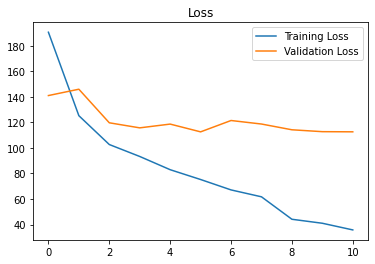

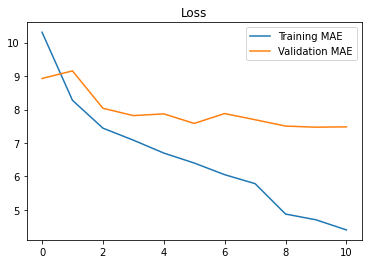

In [ ]:
def plot_metrics_age(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_mae = history['mae']
    val_mae = history['val_mae']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    print('\n\n')

    plt.figure()
    plt.plot(train_mae, label='Training MAE')
    plt.plot(val_mae, label='Validation MAE')
    plt.title('Loss')
    plt.legend()
    plt.show()
plot_metrics_age(vgg_age_history)

### Predict on Gender

In [ ]:
X2_train_gender,X2_val_gender, y2_train_gender, y2_val_gender = train_test_split(X2,gender_classes[:12000], test_size=0.3)

In [ ]:
vgg_model_gender = Sequential([
    base_model,

    Flatten(),                                                                    # Flatten out layers
    Dense(512, activation='relu'),
    Dropout(0.05),

    Dense(128, activation='relu'),
    Dropout(0.05),

    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
vgg_model_gender.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy', 'mse'])
vgg_model_gender.fit(X2_train_gender,y2_train_gender,batch_size=16,
                               epochs=40,validation_data=(X2_val_gender, y2_val_gender),
                               callbacks=callbacks, verbose=2)

Epoch 1/40
525/525 - 52s - loss: 0.4340 - accuracy: 0.7982 - mse: 0.1400 - val_loss: 0.3673 - val_accuracy: 0.8289 - val_mse: 0.1171 - lr: 0.0010 - 52s/epoch - 100ms/step
Epoch 2/40
525/525 - 50s - loss: 0.3206 - accuracy: 0.8575 - mse: 0.1004 - val_loss: 0.3427 - val_accuracy: 0.8408 - val_mse: 0.1082 - lr: 0.0010 - 50s/epoch - 95ms/step
Epoch 3/40
525/525 - 50s - loss: 0.2756 - accuracy: 0.8801 - mse: 0.0847 - val_loss: 0.3342 - val_accuracy: 0.8633 - val_mse: 0.0994 - lr: 0.0010 - 50s/epoch - 95ms/step
Epoch 4/40
525/525 - 41s - loss: 0.2466 - accuracy: 0.8963 - mse: 0.0751 - val_loss: 0.3546 - val_accuracy: 0.8694 - val_mse: 0.0985 - lr: 0.0010 - 41s/epoch - 79ms/step
Epoch 5/40
525/525 - 50s - loss: 0.2300 - accuracy: 0.9027 - mse: 0.0698 - val_loss: 0.3058 - val_accuracy: 0.8714 - val_mse: 0.0936 - lr: 0.0010 - 50s/epoch - 95ms/step
Epoch 6/40
525/525 - 50s - loss: 0.1963 - accuracy: 0.9190 - mse: 0.0592 - val_loss: 0.3433 - val_accuracy: 0.8644 - val_mse: 0.0999 - lr: 0.0010 - 5

In [ ]:
X_data =[]
count=0
for i in dataset[:12000]:
  face = Image.open(i)
  face = face.resize((128, 128))
  X_data.append(np.asarray(face))


X = np.squeeze(X_data)
X = X.astype('float32')
X /= 255
X_train_age,X_val_age, y_train_age, y_val_age = train_test_split(X,age[:12000], test_size=0.30)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128,128,3))
base_model.trainable = False
base_model.summary()

In [ ]:
vgg_age_history= vgg_model_age.history.history
for i in vgg_age_history:
  print(i)

loss
mae
mse
val_loss
val_mae
val_mse
lr


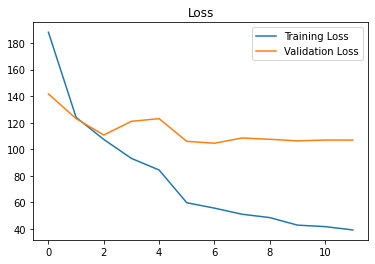

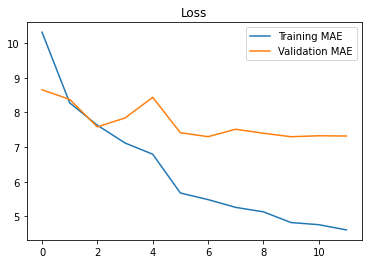

In [ ]:
plot_metrics_age(vgg_age_history)

# Predict on Gender

In [ ]:
X2_train_gender,X2_val_gender, y2_train_gender, y2_val_gender = train_test_split(X2,gender_classes[:12000], test_size=0.3)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128,128,3))
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
vgg_model_gender = Sequential([
    base_model,

    Flatten(),                                                                    # Flatten out layers
    Dense(512, activation='relu'),
    Dropout(0.05),

    Dense(128, activation='relu'),
    Dropout(0.05),

    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [ ]:
vgg_gender_history= vgg_model_gender.history.history

In [ ]:
vgg_model_gender.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy', 'mse'])
vgg_model_gender.fit(X2_train_gender,y2_train_gender,batch_size=16,
                               epochs=40,validation_data=(X2_val_gender, y2_val_gender),
                               callbacks=callbacks, verbose=2)

Epoch 1/40
525/525 - 45s - loss: 0.2026 - accuracy: 0.9179 - mse: 0.0605 - val_loss: 0.3126 - val_accuracy: 0.8664 - val_mse: 0.0931 - lr: 0.0010 - 45s/epoch - 86ms/step
Epoch 2/40
525/525 - 50s - loss: 0.1714 - accuracy: 0.9292 - mse: 0.0507 - val_loss: 0.4018 - val_accuracy: 0.8711 - val_mse: 0.1010 - lr: 0.0010 - 50s/epoch - 95ms/step
Epoch 3/40

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
525/525 - 50s - loss: 0.1515 - accuracy: 0.9380 - mse: 0.0456 - val_loss: 0.3490 - val_accuracy: 0.8553 - val_mse: 0.1050 - lr: 0.0010 - 50s/epoch - 95ms/step
Epoch 4/40
525/525 - 42s - loss: 0.0885 - accuracy: 0.9686 - mse: 0.0247 - val_loss: 0.4337 - val_accuracy: 0.8692 - val_mse: 0.1039 - lr: 2.0000e-04 - 42s/epoch - 79ms/step
Epoch 5/40

Epoch 5: ReduceLROnPlateau reducing learning rate to 4.0000001899898055e-05.
525/525 - 50s - loss: 0.0680 - accuracy: 0.9743 - mse: 0.0188 - val_loss: 0.4795 - val_accuracy: 0.8728 - val_mse: 0.1031 - lr: 2.0000e-04 - 50s/epoc

In [ ]:
def plot_metrics(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    print('\n\n')

    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()


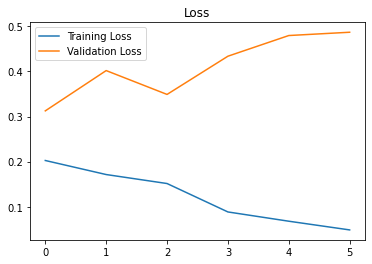

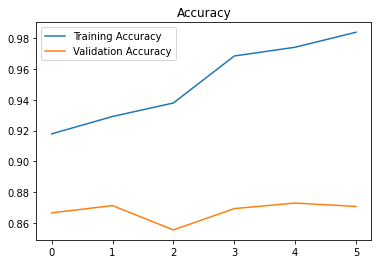

In [ ]:
plot_metrics(vgg_gender_history)

### Predict on Ethnicity

In [ ]:
X2_train_ethnicity,X2_val_ethnicity, y2_train_ethnicity, y2_val_ethnicity = train_test_split(X2,ethnicity_classes[:12000], test_size=0.3)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(128,128,3))
base_model.trainable = False
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [ ]:
vgg_model_ethnicity = Sequential([
    base_model,

    Flatten(),                                                                                                 # Flatten out layers

    Dense(128, activation='relu'),
    Dropout(0.05),

    Dense(32, activation='relu'),
    Dense(5, activation='softmax')
])

In [ ]:
vgg_model_ethnicity.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy', 'mse'])
vgg_model_ethnicity.fit(X2_train_ethnicity,y2_train_ethnicity,batch_size=16,
                               epochs=10,validation_data=(X2_val_ethnicity, y2_val_ethnicity),
                               callbacks=callbacks, verbose=2)

Epoch 1/10
525/525 - 50s - loss: 1.1056 - accuracy: 0.5810 - mse: 0.1104 - val_loss: 0.9566 - val_accuracy: 0.6564 - val_mse: 0.0951 - lr: 0.0010 - 50s/epoch - 95ms/step
Epoch 2/10
525/525 - 40s - loss: 0.8893 - accuracy: 0.6724 - mse: 0.0895 - val_loss: 0.9178 - val_accuracy: 0.6572 - val_mse: 0.0922 - lr: 0.0010 - 40s/epoch - 77ms/step
Epoch 3/10
525/525 - 40s - loss: 0.7793 - accuracy: 0.7189 - mse: 0.0784 - val_loss: 0.8997 - val_accuracy: 0.6747 - val_mse: 0.0902 - lr: 0.0010 - 40s/epoch - 77ms/step
Epoch 4/10
525/525 - 40s - loss: 0.7134 - accuracy: 0.7374 - mse: 0.0730 - val_loss: 0.8134 - val_accuracy: 0.7028 - val_mse: 0.0818 - lr: 0.0010 - 40s/epoch - 77ms/step
Epoch 5/10
525/525 - 49s - loss: 0.6240 - accuracy: 0.7770 - mse: 0.0635 - val_loss: 0.8854 - val_accuracy: 0.6881 - val_mse: 0.0873 - lr: 0.0010 - 49s/epoch - 93ms/step
Epoch 6/10

Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
525/525 - 49s - loss: 0.5700 - accuracy: 0.7908 - mse: 0.0586

In [ ]:
vgg_ethnicity_history= vgg_model_ethnicity.history.history

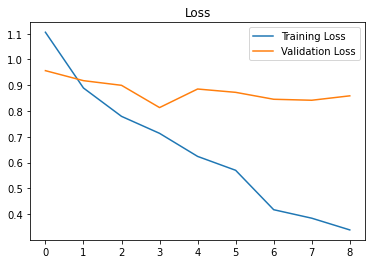

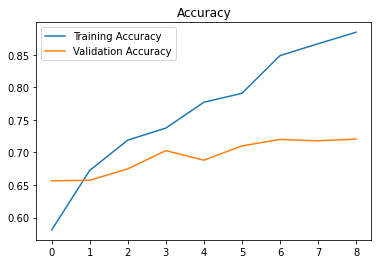

In [ ]:
plot_metrics(vgg_ethnicity_history)

# Comments

Transferring the learned weights from VGG to new modelhelped with the model training to reduce the resources needed.  I used mean squared and absolute error for the first time as well as an optimizer (adam), all of which I had previously heard about. I also found out how long working with 24000 image files would take and how to plan for and work with that. Some choices had to be made based on the time cost attributed to this project. Working with only 10 epochs and half the data were two of them.

I consider the transfer learning technique to be effective in this case as using only 10 epochs, the accuracy and losses were good enough that further tuning looked promising. This is probably because the VGG was done on human faces, even with angles, and the UTKFace seems to be a subset of the options in the vgg data.